In [1]:
import IPython.display as ipd
ipd.Audio(r'F:\sensez9\Audio_ML\data\cats_dogs\train\cat\cat_4.wav')

In [3]:
import librosa

data, sampling_rate = librosa.load(r'F:\sensez9\Audio_ML\data\cats_dogs\train\cat\cat_4.wav')

In [4]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.01139749,
       -0.00493222,  0.        ], dtype=float32)

In [5]:
sampling_rate

22050

Populating the interactive namespace from numpy and matplotlib


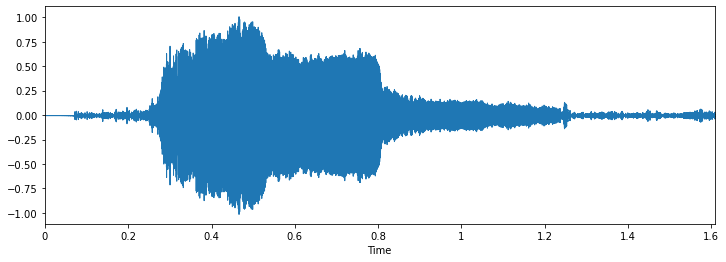

In [7]:
% pylab inline
import os
import pandas as pd
import librosa.display
 

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

In [13]:
import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

#from keras.layers import Dense, Dropout, Activation
#from keras.optimizers import Adam
#from keras.utils import to_categorical

In [17]:
fn = r'F:\sensez9\Audio_ML\data\cats_dogs\train\cat\cat_4.wav'
librosa_audio, librosa_sample_rate = librosa.load(fn)
scipy_sample_rate, scipy_audio = wav.read(fn)
print("Original sample rate: {}".format(scipy_sample_rate))
print("Librosa sample rate: {}".format(librosa_sample_rate))

Original sample rate: 16000
Librosa sample rate: 22050


In [38]:
print('Original audio file min~max range: {} to {}'.format(np.min(scipy_audio), np.max(scipy_audio)))
print('Librosa audio file min~max range: {} to {}'.format(np.min(librosa_audio), np.max(librosa_audio)))

Original audio file min~max range: -32736 to 27965
Librosa audio file min~max range: -1.0113294124603271 to 0.8477505445480347


In [40]:
experiment = Experiment(api_key="API_KEY",project_name="urbansound8k")

NameError: name 'Experiment' is not defined

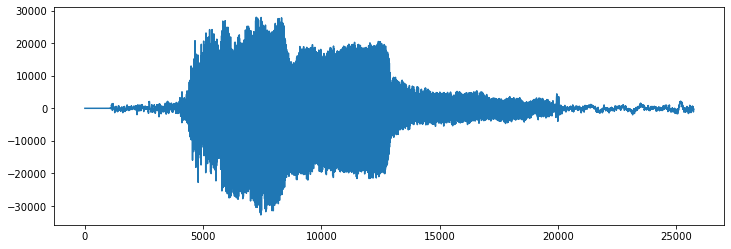

In [41]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)
plt.savefig('original_audio.png')


In [42]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc = 40)

In [43]:
mfccs

array([[-523.55427843, -523.55427843, -425.81761305, ..., -292.11088631,
        -289.63070468, -292.88126857],
       [   0.        ,    0.        ,  100.47872078, ...,  139.16960897,
         140.52332567,  136.89915771],
       [   0.        ,    0.        ,   39.96825928, ...,   -7.28911441,
         -10.04440632,  -11.9751208 ],
       ...,
       [   0.        ,    0.        ,    3.28259252, ...,    0.76130158,
           1.39370327,    3.52810203],
       [   0.        ,    0.        ,   -3.37623883, ...,    5.9843499 ,
           1.40106302,   -1.00659268],
       [   0.        ,    0.        ,   -3.06716374, ...,    6.43684941,
           3.25137733,   -4.62071813]])

In [44]:
mfccs.shape

(40, 70)

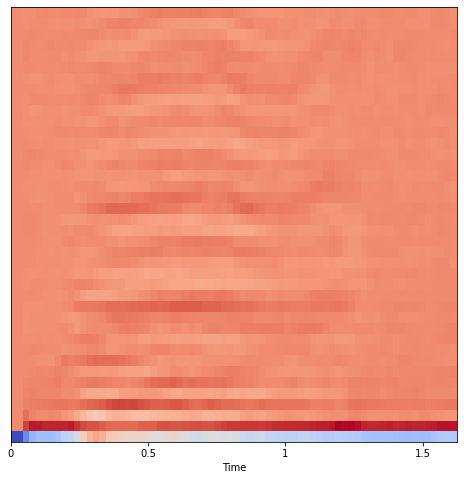

In [45]:
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=librosa_sample_rate, x_axis='time')
plt.savefig('MFCCs.png')

In [136]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    print(mfccs_processed)
    return mfccs_processed



In [60]:
import pandas as pd

df = pd.DataFrame(mfccs)

In [62]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,-523.554278,-523.554278,-425.817613,-340.397740,-321.051191,-319.845708,-321.578574,-307.125380,-263.746614,-247.763750,...,-317.806293,-322.941542,-324.032110,-322.318467,-325.647442,-321.262201,-305.164598,-292.110886,-289.630705,-292.881269
1,0.000000,0.000000,100.478721,136.819952,135.354975,130.108160,128.834213,127.941638,129.661775,134.491036,...,125.599964,127.924099,130.921592,130.306656,129.673414,132.220300,135.596133,139.169609,140.523326,136.899158
2,0.000000,0.000000,39.968259,14.069505,3.159832,2.527993,7.623573,2.564646,-11.427892,-22.399902,...,-5.203893,-0.692946,1.490593,-1.194962,3.490433,2.073673,-2.922904,-7.289114,-10.044406,-11.975121
3,0.000000,0.000000,16.216765,20.701358,24.813495,26.943933,30.770989,35.581290,34.094904,25.497775,...,24.093454,21.427579,22.293842,24.254656,23.670615,18.063148,21.902498,24.483568,25.815588,25.888360
4,0.000000,0.000000,14.673704,15.374200,11.038179,9.094364,10.098192,12.026855,0.652234,-0.279040,...,14.215386,10.221339,13.551330,16.118446,10.556500,5.587952,5.323271,5.213282,6.202674,2.274192


In [64]:
mfccs_array = mfccs.reshape(-1,1)

In [65]:
mfccs_array.shape

(2800, 1)

In [66]:
mfccs_array

array([[-523.55427843],
       [-523.55427843],
       [-425.81761305],
       ...,
       [   6.43684941],
       [   3.25137733],
       [  -4.62071813]])

In [67]:
mfccs_array_transpose = mfccs_array.transpose()

In [68]:
mfccs_array_transpose

array([[-523.55427843, -523.55427843, -425.81761305, ...,    6.43684941,
           3.25137733,   -4.62071813]])

In [80]:
df1 = pd.DataFrame(mfccs_array_transpose)

In [82]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799
0,-523.554278,-523.554278,-425.817613,-340.39774,-321.051191,-319.845708,-321.578574,-307.12538,-263.746614,-247.76375,...,0.28452,-0.646896,2.142046,2.451228,-2.36715,-1.116772,2.443528,6.436849,3.251377,-4.620718


In [84]:
k = []

list(df1.iloc[0])

[-523.5542784312065,
 -523.5542784312065,
 -425.8176130461884,
 -340.39774030600273,
 -321.0511912652747,
 -319.845708468208,
 -321.578573684497,
 -307.12537997249524,
 -263.74661431836086,
 -247.763749816947,
 -207.53842287909956,
 -126.487689257236,
 -66.99937216754408,
 -42.00383949928525,
 -60.92651153937578,
 -109.95729756690665,
 -124.70665220048814,
 -138.4888323314713,
 -149.57171067472618,
 -146.49789801177363,
 -146.75356694988477,
 -158.77200412357323,
 -183.2595787569858,
 -181.7807297698667,
 -170.26068810725604,
 -153.51546384322944,
 -164.8473441533265,
 -191.76059997427652,
 -209.76561051342605,
 -219.47853357835265,
 -201.5892017288962,
 -191.30340896180766,
 -197.19289085762458,
 -204.61464591888938,
 -193.9735221394099,
 -202.48531580482933,
 -237.15493055301525,
 -244.47061812762772,
 -233.0768106916778,
 -230.67909475915494,
 -247.26393211645058,
 -256.7602236301012,
 -263.28968131908283,
 -265.0017897599073,
 -263.582094046393,
 -254.03380200788172,
 -252.73095990

In [86]:
fn2 = r'F:\sensez9\Audio_ML\data\cats_dogs\train\cat\cat_2.wav'
librosa_audio2, librosa_sample_rate2 = librosa.load(fn2)

mfccs2 = librosa.feature.mfcc(y=librosa_audio2, sr=librosa_sample_rate2, n_mfcc = 40)

In [88]:
mfccs2.shape

(40, 517)

In [89]:
mfccs.shape

(40, 70)

In [90]:
mfccs2

array([[-3.06730518e+02, -3.11902513e+02, -3.07362242e+02, ...,
        -3.65222215e+02, -3.67869817e+02, -3.68575180e+02],
       [ 1.60002512e+02,  1.58267060e+02,  1.61670753e+02, ...,
         1.28312434e+02,  1.27868925e+02,  1.27516705e+02],
       [ 1.44795911e+01,  1.38182421e+01, -1.49731290e-01, ...,
         2.83068538e+00,  1.20527174e+00,  1.96831205e+00],
       ...,
       [-2.48069909e+00, -2.76374642e+00,  8.85093478e+00, ...,
        -2.71063365e+00, -1.46708249e+00,  2.37224223e+00],
       [-3.45577155e+00, -4.72557040e+00,  4.36265410e+00, ...,
        -2.87609283e+00, -8.25634925e-01,  9.99307342e-01],
       [-4.25241894e+00, -3.31652827e+00,  2.89689242e-01, ...,
         1.29245362e+00,  2.82654606e+00,  1.14395852e+00]])

In [127]:
data2 =[mfccs,mfccs2]

In [132]:
df = pd.DataFrame(data2)
df

,0
0,"[[-523.5542784312065, -523.5542784312065, -425..."
1,"[[-306.73051831309743, -311.9025131059757, -30..."


In [153]:

file = pd.read_csv(r'F:\sensez9\Audio_ML\data\train_test_split.csv')

In [155]:
file.head()

,Unnamed: 0,test_cat,test_dog,train_cat,train_dog
0,0,cat_22.wav,dog_barking_97.wav,cat_99.wav,dog_barking_33.wav
1,1,cat_116.wav,dog_barking_0.wav,cat_54.wav,dog_barking_86.wav
2,2,cat_155.wav,dog_barking_93.wav,cat_34.wav,dog_barking_45.wav
3,3,cat_58.wav,dog_barking_10.wav,cat_132.wav,dog_barking_76.wav
4,4,cat_77.wav,dog_barking_26.wav,cat_124.wav,dog_barking_4.wav


In [165]:
train_cat = file[['train_cat']]
test_cat = file[['test_cat']]

train_dog = file[['train_dog']]
test_dog = file[['test_dog']]

test_cat = test_cat[0:49]
test_dog = test_dog[0:49]

In [149]:
list1

In [167]:
train_cat.head()

,train_cat
0,cat_99.wav
1,cat_54.wav
2,cat_34.wav
3,cat_132.wav
4,cat_124.wav


In [180]:
train_cat.loc[0]

train_cat    cat_99.wav
Name: 0, dtype: object

In [182]:
import os
import glob
import pandas as pd
import numpy as np

#files_path = "F:\sensez9\Audio_ML\data\cats_dogs\train\cat"

#read_files = glob.glob(os.path.join(files_path))

np_array_values = []
for files in train_cat:
    fn2 = (r'F:\sensez9\Audio_ML\data\cats_dogs\train\cat\train.iloc[0].wav')
    librosa_audio2, librosa_sample_rate2 = librosa.load(fn2)
    
    mfccs2 = librosa.feature.mfcc(y=librosa_audio2, sr=librosa_sample_rate2, n_mfcc = 40)
    
    np_array_values.append(mfccs2)

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\sensez9\\Audio_ML\\data\\cats_dogs\\train\\cat\\train.iloc[0].wav'

In [186]:
import wave, os, glob
zero = []
path = r'F:\sensez9\Audio_ML\data\cats_dogs\train\cat'
for filename in glob.glob(os.path.join(path, '*.wav')):
    w = wave.open(filename, 'r')
    d = w.readframes(w.getnframes())
    zero.append(d)


In [199]:
fn2 = r'F:\sensez9\Audio_ML\data\cats_dogs\train\cat\cat_4.wav'
librosa_audio2, librosa_sample_rate2 = librosa.load(fn2)

m1 = librosa.feature.mfcc(y=librosa_audio2, sr=librosa_sample_rate2, n_mfcc = 40)

In [200]:
import os
import glob
import wave
path = 'F:/sensez9/Audio_ML/data/cats_dogs/train/cat'
files = os.listdir(path)

for filename in glob.glob(os.path.join(path, '*.wav')):
    pl = wave.open(filename, 'r')


In [202]:
import os
import glob
path = 'F:/sensez9/Audio_ML/data/cats_dogs/train/cat'
files = os.listdir(path)

zero =[]

for filename in glob.glob(os.path.join(path, '*.wav')):
    samplerate, data = librosa.load(filename)
    #librosa_audio2, librosa_sample_rate2 = librosa.load(filename)
    print(zero.append(samplerate))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [ ]:
###### LIBROSA CODE #####

In [205]:
from glob import glob
#directories of normal audios
#norm_data_dir = ‘./audio-processing-files/normals/’
norm_data_dir = 'F:/sensez9/Audio_ML/data/cats_dogs/train/cat/'
#'F:/sensez9/Audio_ML/data/cats_dogs/train/cat/'
norm_audio_files = glob(norm_data_dir + '*.wav')

In [208]:

#### Get Feature Vector #####

import librosa
from librosa import feature
import numpy as np
fn_list_i = [
 feature.chroma_stft,
 feature.spectral_centroid,
 feature.spectral_bandwidth,
 feature.spectral_rolloff
]
 
fn_list_ii = [
 feature.rmse,
 feature.zero_crossing_rate
]
def get_feature_vector(y,sr): 
    feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
    feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii] 
    feature_vector = feat_vect_i + feat_vect_ii 
    return feature_vector

In [209]:
norm_audios_feat = []
for file in norm_audio_files:
    y , sr = librosa.load(file,sr=None)
    feature_vector = get_feature_vector(y, sr)
    norm_audios_feat.append(feature_vector) 

C:\Users\Ted\Anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


In [212]:
norm_audios_feat

[[0.4743731059714483,
  1559.4105909501395,
  1685.7892162451697,
  3229.255698005698,
  0.029395552,
  0.10284093438390314],
 [0.33914295043101256,
  2630.2409819255854,
  1696.5314498958617,
  4527.609481292517,
  0.10253616,
  0.22172452965561223],
 [0.25246257867409605,
  1910.641455383688,
  1551.0437582910697,
  3542.3018292682927,
  0.2251533,
  0.1497951600609756],
 [0.40239716915695484,
  1966.3795057482055,
  1763.861972436556,
  3852.9079861111113,
  0.065487854,
  0.14983045789930555],
 [0.3683840249895724,
  1807.307888982091,
  1688.5857532153755,
  3475.0744047619046,
  0.052719425,
  0.13452080050770307],
 [0.39900060571963253,
  1807.668689611812,
  1696.7671738924562,
  3519.261136968085,
  0.045395616,
  0.13697198096742022],
 [0.5330323307678543,
  1897.1004245499737,
  2035.7420500853946,
  4312.5210013440865,
  0.027753195,
  0.10925949260752688],
 [0.5527190308443654,
  1863.0039246020965,
  1985.5472897554428,
  4137.6953125,
  0.034301788,
  0.1019053357712766]

In [213]:
feature_train_cat_df = pd.DataFrame(norm_audios_feat)

In [215]:
feature_train_cat_df.head()

,0,1,2,3,4,5
0,0.474373,1559.410591,1685.789216,3229.255698,0.029396,0.102841
1,0.339143,2630.240982,1696.531450,4527.609481,0.102536,0.221725
2,0.252463,1910.641455,1551.043758,3542.301829,0.225153,0.149795
3,0.402397,1966.379506,1763.861972,3852.907986,0.065488,0.149830
4,0.368384,1807.307889,1688.585753,3475.074405,0.052719,0.134521


In [216]:
feature_train_cat_df.shape

(125, 6)

In [ ]:
######## train_df_dog ########

In [217]:
from glob import glob
#directories of normal audios
#norm_data_dir = ‘./audio-processing-files/normals/’
norm_data_dir = 'F:/sensez9/Audio_ML/data/cats_dogs/train/dog/'
#'F:/sensez9/Audio_ML/data/cats_dogs/train/cat/'
norm_audio_files = glob(norm_data_dir + '*.wav')


norm_audios_feat2 = []
for file in norm_audio_files:
    y , sr = librosa.load(file,sr=None)
    feature_vector = get_feature_vector(y, sr)
    norm_audios_feat2.append(feature_vector) 

In [219]:
feature_train_dog_df = pd.DataFrame(norm_audios_feat2)

feature_train_dog_df.head()

,0,1,2,3,4,5
0,0.362788,1171.224989,1257.703525,1863.063429,0.024400,0.090318
1,0.351446,1454.878227,1441.779103,2534.478306,0.050239,0.113157
2,0.273050,942.828397,1142.840854,1380.208333,0.133173,0.067370
3,0.422488,1671.584598,1709.738407,3344.423491,0.034367,0.104374
4,0.478445,1484.563367,1822.995647,3135.222739,0.070831,0.067824


In [220]:
feature_train_dog_df.shape

(85, 6)

In [228]:
##### test cat #####


from glob import glob
#directories of normal audios
#norm_data_dir = ‘./audio-processing-files/normals/’
norm_data_dir = 'F:/sensez9/Audio_ML/data/cats_dogs/test/cats/'
#'F:/sensez9/Audio_ML/data/cats_dogs/train/cat/'
norm_audio_files = glob(norm_data_dir + '*.wav')


norm_audios_feat3 = []
for file in norm_audio_files:
    y , sr = librosa.load(file,sr=None)
    feature_vector = get_feature_vector(y, sr)
    norm_audios_feat3.append(feature_vector) 
    

feature_test_cat_df = pd.DataFrame(norm_audios_feat3)
print(feature_test_cat_df.shape)
feature_test_cat_df.head()



C:\Users\Ted\Anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


(39, 6)


,0,1,2,3,4,5
0,0.247088,2237.179815,1823.177422,4312.695312,0.172175,0.185876
1,0.488276,1345.576377,952.893098,2131.422375,0.082471,0.162979
2,0.400303,2025.188446,1963.884878,4279.570998,0.016492,0.129101
3,0.365342,2481.091008,1782.927758,4384.308511,0.037482,0.198684
4,0.248067,1220.040390,1275.208919,2151.160714,0.139273,0.082160


In [229]:
##### test_dog #######



from glob import glob
#directories of normal audios
#norm_data_dir = ‘./audio-processing-files/normals/’
norm_data_dir = 'F:/sensez9/Audio_ML/data/cats_dogs/test/test/'
#'F:/sensez9/Audio_ML/data/cats_dogs/train/cat/'
norm_audio_files = glob(norm_data_dir + '*.wav')


norm_audios_feat4 = []
for file in norm_audio_files:
    y , sr = librosa.load(file,sr=None)
    feature_vector = get_feature_vector(y, sr)
    norm_audios_feat4.append(feature_vector) 
    

feature_test_dog_df = pd.DataFrame(norm_audios_feat4)
print(feature_test_dog_df.shape)
feature_test_dog_df.head()

(28, 6)


,0,1,2,3,4,5
0,0.347797,1719.378066,1602.765138,2979.370915,0.087310,0.134529
1,0.398296,902.409663,1118.623256,1406.572165,0.078522,0.063225
2,0.327221,1281.728653,997.356515,2283.445670,0.126296,0.109946
3,0.186662,979.054489,705.045747,1446.392276,0.291662,0.082849
4,0.380365,1428.244679,1655.218761,2844.946809,0.053977,0.069729


In [230]:
feature_train_cat_df.shape

(125, 6)

In [231]:
feature_train_dog_df.shape

(85, 6)

In [232]:
feature_test_cat_df.shape

(39, 6)

In [233]:
feature_test_dog_df.shape

(28, 6)

In [262]:
#### train cat #######


df1 = [norm_audios_feat]

df1= pd.DataFrame(df1)

df1_arr = df1.values

df1_t = df1_arr.transpose()

train_cat = pd.DataFrame(df1_t)



train_cat['label'] = 'cat'

train_cat.to_csv(r'F:\sensez9\Audio_ML\data\train_cat_features.csv')

train_cat.head()



,0,label
0,"[0.4743731059714483, 1559.4105909501395, 1685....",cat
1,"[0.33914295043101256, 2630.2409819255854, 1696...",cat
2,"[0.25246257867409605, 1910.641455383688, 1551....",cat
3,"[0.40239716915695484, 1966.3795057482055, 1763...",cat
4,"[0.3683840249895724, 1807.307888982091, 1688.5...",cat


In [261]:
####### train_dog #########

df2 = [norm_audios_feat2]

df2= pd.DataFrame(df2)

df2_arr = df2.values

df2_t = df2_arr.transpose()

train_dog = pd.DataFrame(df2_t)

train_dog['label'] = 'dog'

train_dog.to_csv(r'F:\sensez9\Audio_ML\data\train_dog_features.csv')

train_dog.head()



,0,label
0,"[0.36278810941762124, 1171.2249888228962, 1257...",dog
1,"[0.35144605175115373, 1454.8782273521872, 1441...",dog
2,"[0.27304987597602043, 942.8283969813286, 1142....",dog
3,"[0.4224882722172074, 1671.584598464496, 1709.7...",dog
4,"[0.47844492282812584, 1484.5633671139642, 1822...",dog


In [266]:

#!conda install -c conda-forge keras --yes